# Image Classification using CNN for MNIST DATASET

### Step 1: Import Necessary Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


## from tensorflow.keras.models import Sequential

This imports the Sequential model from Keras, which is a high-level neural networks API running on top of TensorFlow. The Sequential model is a linear stack of layers, meaning you can add layers to it in a sequential manner.



## from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

This imports several types of layers that can be used to build a neural network:

    Conv2D: 
    This is a convolutional layer that applies convolution operations to the input. It is used for feature extraction in image data. Convolutional layers are key components in Convolutional Neural Networks (CNNs) and are responsible for detecting spatial hierarchies in images.
    
    MaxPooling2D: 
    This is a pooling layer that performs max pooling, which reduces the spatial dimensions (width and height) of the input volume for the next layer. Max pooling helps in down-sampling the input representation, reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.
    
    Flatten: This layer flattens the input, converting a 2D matrix of features into a vector. This step is typically used to transition from convolutional layers to fully connected layers.
    
    Dense: This is a fully connected (or dense) layer where each neuron is connected to every neuron in the previous layer. These layers are used for the final classification or regression tasks.
    
    Dropout: This layer helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time, which helps in regularization.



### from tensorflow.keras.utils import to_categorical

This utility function converts a class vector (integers) to binary class matrix (one-hot encoding). This is commonly used when dealing with classification problems where the target labels need to be converted into a format suitable for training a neural network.

### Step 2: Load and Preprocess Data

In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to (samples, height, width, channels) for CNN input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Step 3: Define the CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


/Users/kiranpaudel/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Train the Model

In [6]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8958 - loss: 0.3297 - val_accuracy: 0.9830 - val_loss: 0.0525
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9859 - loss: 0.0463 - val_accuracy: 0.9862 - val_loss: 0.0431
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9894 - loss: 0.0347 - val_accuracy: 0.9874 - val_loss: 0.0388
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9919 - loss: 0.0243 - val_accuracy: 0.9923 - val_loss: 0.0241
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9910 - val_loss: 0.0289


### Step 5: Evaluate the Model

In [7]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')


Test accuracy: 0.9910


### Step 6: Visualize Training History (Optional)

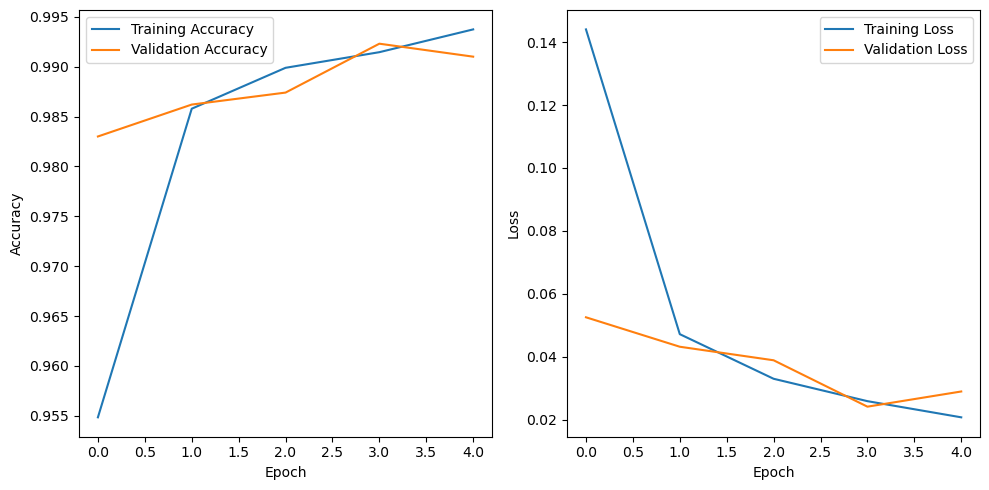

In [8]:
# Plot training history
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Example: Make predictions on a single image from the test set
index = 0  # Replace with any index from the test set
prediction = model.predict(np.expand_dims(X_test[index], axis=0))
predicted_label = np.argmax(prediction)
true_label = np.argmax(y_test[index])

print(f'Predicted label: {predicted_label}')
print(f'True label: {true_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted label: 7
True label: 7


In [16]:
from tensorflow.keras.preprocessing import image

# Load the image from file
img_path = 'digit3.png'  # Replace with the path to your image file
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize pixel values to between 0 and 1
img_array = img_array.astype('float32') / 255.0

# Reshape the image to (1, height, width, channels) for single prediction
img_array = np.expand_dims(img_array, axis=0)


In [17]:
# Make predictions using your model
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Print the predicted class label
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted class: 7
